INFO:cmdstanpy:compiling stan file /home/kasia/Documents/DataAnalytics/Lab3/stan1.stan to exe file /home/kasia/Documents/DataAnalytics/Lab3/stan1
INFO:cmdstanpy:compiled model executable: /home/kasia/Documents/DataAnalytics/Lab3/stan1
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.



Processing csv files: /tmp/tmpq8agzlpy/stan1-20220320123050_1.csv, /tmp/tmpq8agzlpy/stan1-20220320123050_2.csv, /tmp/tmpq8agzlpy/stan1-20220320123050_3.csv, /tmp/tmpq8agzlpy/stan1-20220320123050_4.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
167 of 4000 (4.17%) transitions ended with a divergence.
These divergent transitions indicate that HMC is not fully able to explore the posterior distribution.
Try increasing adapt delta closer to 1.
If this doesn't remove all divergences, try to reparameterize the model.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory.

Effective sample size satisfactory.

Split R-hat values satisfactory all parameters.

Processing complete.



INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.



Processing csv files: /tmp/tmpq8agzlpy/stan1-20220320123102_1.csv, /tmp/tmpq8agzlpy/stan1-20220320123102_2.csv, /tmp/tmpq8agzlpy/stan1-20220320123102_3.csv, /tmp/tmpq8agzlpy/stan1-20220320123102_4.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
No divergent transitions found.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory.

Effective sample size satisfactory.

Split R-hat values satisfactory all parameters.

Processing complete, no problems detected.



<AxesSubplot:xlabel='mu', ylabel='log_sigma'>

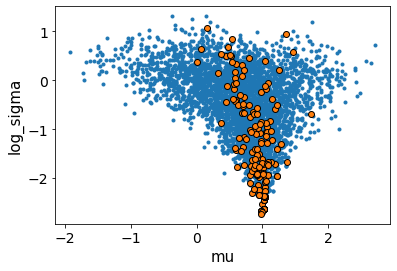

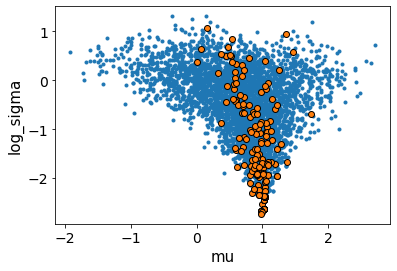

In [2]:

from cmdstanpy import CmdStanModel
import pandas as pd
import arviz as az 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import csv 

"""-----------------------Exercise 1-----------------------""" 
#1 1 sample
model1 = CmdStanModel(stan_file='stan1.stan')
resultA = model1.sample(data={'N':1, 'y':[1]}, seed = 15032022, chains = 4)
print(resultA.diagnose())

#Convertion to arviz InferenceData
arviz_resultA = az.from_cmdstanpy(posterior=resultA)

#Calculate log sigma
post = arviz_resultA.posterior
post["log_sigma"] = np.log(post["sigma"])
arviz_resultA

#Arviz plot
az.plot_pair(arviz_resultA, var_names=['mu', 'log_sigma'], divergences=True)


#2 6 samples
resultB = model1.sample(data={'N':6, 'y':[-309, -1.84, 0.48, 1.14, 2.45, 6.7]}, seed = 15032022, chains = 4)
print(resultB.diagnose())

#Convertion to arviz InferenceData
arviz_resultB = az.from_cmdstanpy(posterior=resultA)

#Calculate log sigma
post = arviz_resultB.posterior
post["log_sigma"] = np.log(post["sigma"])
arviz_resultB

#Arviz plot
az.plot_pair(arviz_resultB, var_names=['mu', 'log_sigma'], divergences=True)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


array([[<AxesSubplot:title={'center':'theta'}>]], dtype=object)

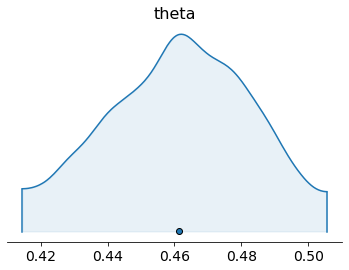

In [10]:
"""-----------------------Exercise 2-----------------------""" 
#Data read fromm coin.csv
#y = 
#N = 

my_csv1 = pd.read_csv('coin.csv')
N = len(my_csv1.Experiment_Id)
y = my_csv1.Toss_Result


model2 = CmdStanModel(stan_file='stan2.stan')
result2 = model2.sample(data={"N" : N, "y" : y}, seed = 9012022, chains = 4)
result2.summary()

#Convertion to arviz InferenceData
arviz_result2 = az.from_cmdstanpy(posterior=result2)
arviz_result2

az.plot_density(arviz_result2, shade=0.1)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


/tmp/ipykernel_6336/1281395680.py:32: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  plt.hist('y_prior')


(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

/home/kasia/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


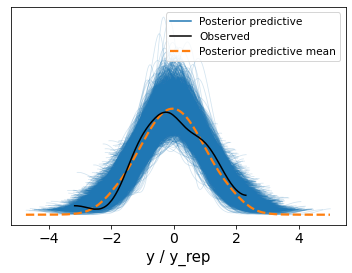

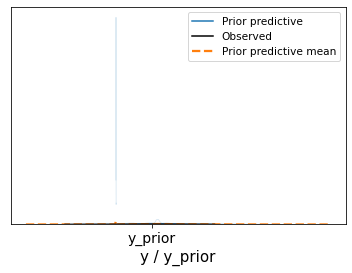

In [17]:
"""-----------------------Exercise 3-----------------------""" 
#Data read fromm normal.csv
#y = 
#N = 
my_csv2 = pd.read_csv('normal.csv')
N = len(my_csv2.value)
y = my_csv2.value

#1 posterior predictive
model3A = CmdStanModel(stan_file='stan3.stan')
result3A = model3A.sample(data={'N':N, 'y':y}, seed = 9012022, chains = 4)
result3A.summary()

#Convertion to arviz InferenceData
arviz_result3A = az.from_cmdstanpy(posterior=result3A, posterior_predictive=["y_rep"], observed_data={"y": y})
arviz_result3A

#Arviz plot
az.plot_ppc(arviz_result3A,data_pairs={"y": "y_rep"})

#2 prior predictive
model3B = CmdStanModel(stan_file='stan4.stan')
result3B = model3B.sample(data={'N':100}, chains = 1,fixed_param=True,seed = 523833)
result3B.summary()

#Convertion to arviz InferenceData
arviz_result3B = az.from_cmdstanpy(prior=result3B,prior_predictive=["y_prior"],observed_data={"y": y})
arviz_result3B
az.plot_ppc(arviz_result3B, group="prior", data_pairs={"y": "y_prior"}, num_pp_samples=30)

#y_prior histogram
plt.hist('y_prior')